In [3]:
# Loading the Data
import json
import pandas as pd

# Loading customers.json data to pandas
with open('customers.json', 'r') as file:
     customers_data = json.load(file)
customers_df = pd.DataFrame(customers_data)

# Load transaction_logs.json dsata to pandas
with open('transaction_logs.json', 'r') as file:
    transaction_logs_data = json.load(file)
transaction_logs_df = pd.DataFrame(transaction_logs_data)

In [14]:
#Basic Data Structure
print("customers tables data strucuture")
print(customers_df.head())    # Check the first few rows of each DataFrame of customers table
print("------------------------------------------------ ")
print(customers_df.info())    # Summarizing data  of customers table
print("------------------------------------------------ ")
print(customers_df.dtypes)    # data types and column names of customers table

print("==================================================================================================")

print("customers tables data strucuture")
print(transaction_logs_df.head())    # Check the first few rows of each DataFrame of transaction table
print("------------------------------------------------ ")
print(transaction_logs_df.info())    # Summarizing data of transaction table
print("------------------------------------------------ ")
print(transaction_logs_df.dtypes)    # data types and column names of transaction table

customers tables data strucuture
   customer_id     customer_name     country           city
0         9780      Jessica Hart  Martinique  South William
1         9169         Amy Clark  Kazakhstan     Davisville
2         6631  Danielle Elliott     Armenia     East Danny
3         8772     Robin Mendoza      Uganda    Johnsonbury
4         8913    Abigail Miller     Namibia  Wrightchester
------------------------------------------------ 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1000 non-null   int64 
 1   customer_name  1000 non-null   object
 2   country        1000 non-null   object
 3   city           1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB
None
------------------------------------------------ 
customer_id       int64
customer_name    object
country          object
city            

In [21]:
# finding key columns in data framse
print("Customer Data Columns:", customers_df.columns.tolist())
print()
print("Transaction Logs Columns:", transaction_logs_df.columns.tolist())
print("=====================datatype of customer table==============================")
print(customers_df.dtypes)
print("=====================datatype of transaction table===========================")
print(transaction_logs_df.dtypes)

Customer Data Columns: ['customer_id', 'customer_name', 'country', 'city']

Transaction Logs Columns: ['order_id', 'customer_id', 'product_id', 'product_name', 'product_category', 'payment_type', 'qty', 'price', 'datetime', 'ecommerce_website_name', 'payment_txn_id', 'payment_txn_success', 'failure_reason']
=====================datatype of customer table==============================
customer_id       int64
customer_name    object
country          object
city             object
dtype: object
=====================datatype of transaction table===========================
order_id                   int64
customer_id                int64
product_id                 int64
product_name              object
product_category          object
payment_type              object
qty                        int64
price                      int64
datetime                  object
ecommerce_website_name    object
payment_txn_id            object
payment_txn_success       object
failure_reason            obj

In [22]:
# Check missing values
print("===================== count of missing values in  customer table==============================")
print(customers_df.isnull().sum())
print("===================== count of missing values in  transaction table==============================")
print(transaction_logs_df.isnull().sum())


===================== count of missing values in  customer table==============================
customer_id      0
customer_name    0
country          0
city             0
dtype: int64
===================== count of missing values in  transaction table==============================
order_id                  0
customer_id               0
product_id                0
product_name              0
product_category          0
payment_type              0
qty                       0
price                     0
datetime                  0
ecommerce_website_name    0
payment_txn_id            0
payment_txn_success       0
failure_reason            0
dtype: int64


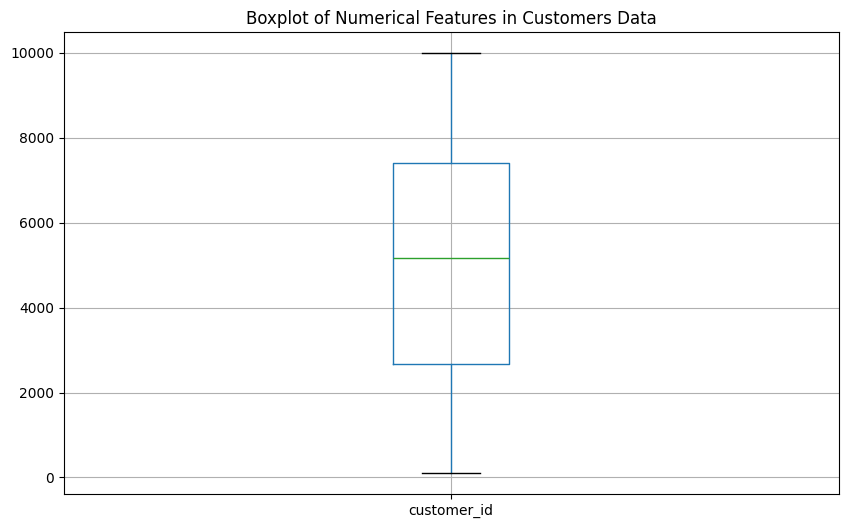

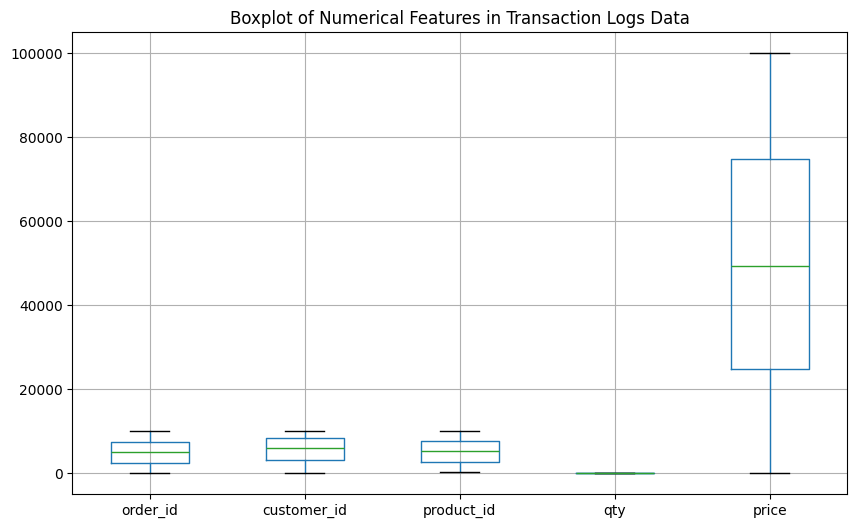

In [23]:
#OPTIONAL
#Outliers Detection
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for numerical columns in customers_df
customers_df.select_dtypes(include=['float64', 'int64']).boxplot(figsize=(10, 6))
plt.title('Boxplot of Numerical Features in Customers Data')
plt.show()

# Boxplot for numerical columns in transaction_logs_df
transaction_logs_df.select_dtypes(include=['float64', 'int64']).boxplot(figsize=(10, 6))
plt.title('Boxplot of Numerical Features in Transaction Logs Data')
plt.show()

In [24]:
# Step -3 :- create and insert the database, customers and transcations table
import mysql.connector
import json

def Conn():
    return mysql.connector.connect(
        host="localhost",
        user="root",
        password="1234",
        database="project_p00"
    )

def load_data():
    with open(r'D:\UB\revature_p00\customers.json', 'r') as json_file1:
        customers = json.load(json_file1)
    
    with open(r'D:\UB\revature_p00\transaction_logs.json', 'r') as json_file2:
        transactions = json.load(json_file2)
    
    return customers, transactions

def create_tables(cursor):
    # Temporarily disable foreign key checks
    cursor.execute("SET FOREIGN_KEY_CHECKS = 0;")
    
    # Drop existing tables if they exist
    cursor.execute("DROP TABLE IF EXISTS Transactions;")
    cursor.execute("DROP TABLE IF EXISTS Customers;")
    
    # Re-enable foreign key checks
    cursor.execute("SET FOREIGN_KEY_CHECKS = 1;")
    
    # Create Customers Table
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS Customers (
            customer_id INT PRIMARY KEY,
            customer_name VARCHAR(100) NOT NULL,
            country VARCHAR(100),
            city VARCHAR(50)
        ) ENGINE=InnoDB;
    """)
    
    # Create Transactions Table
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS Transactions (
            order_id INT PRIMARY KEY,
            customer_id INT,
            product_id INT,
            product_name VARCHAR(100),
            product_category VARCHAR(50),
            payment_type VARCHAR(20),
            qty INT,
            price DECIMAL(10, 2),
            datetime DATETIME,
            ecommerce_website_name VARCHAR(100),
            payment_txn_id VARCHAR(50),
            payment_txn_success CHAR(1),
            failure_reason VARCHAR(100),
            FOREIGN KEY (customer_id) REFERENCES Customers(customer_id)
        ) ENGINE=InnoDB;
    """)

def insert_data(cursor, customers, transactions):
    # Insert Customers
    for customer in customers:
        try:
            cursor.execute(
                "INSERT INTO Customers (customer_id, customer_name, country, city) VALUES (%s, %s, %s, %s)",
                (customer['customer_id'], customer['customer_name'], customer['country'], customer['city'])
            )
        except mysql.connector.Error as err:
            print(f"Customer Insert Error: {err}")
    
    # Insert Transactions
    for transaction in transactions:
        try:
            cursor.execute(
                "INSERT INTO Transactions (order_id, customer_id, product_id, product_name, product_category, payment_type, qty, price, datetime, ecommerce_website_name, payment_txn_id, payment_txn_success, failure_reason) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)",
                (
                    transaction['order_id'], transaction['customer_id'], transaction['product_id'],
                    transaction['product_name'], transaction['product_category'], transaction['payment_type'],
                    transaction['qty'], transaction['price'], transaction['datetime'],
                    transaction['ecommerce_website_name'], transaction['payment_txn_id'],
                    transaction['payment_txn_success'], transaction['failure_reason']
                )
            )
        except mysql.connector.Error as err:
            print(f"Transaction Insert Error: {err}")

def display_table(cursor, table_name):
    cursor.execute(f"SELECT * FROM {table_name}")
    results = cursor.fetchall()
    
    print(f"\n{table_name} Table:")
    i = 0
    for row in results:
        i +=1
        print(row)
        if i == 5:
            break

def main():
    customers, transactions = load_data()

    try:
        MYDB = Conn()
        cursor = MYDB.cursor()

        # Ensure tables are created first
        create_tables(cursor)

        # Insert data into tables
        insert_data(cursor, customers, transactions)

        MYDB.commit()
        print("Data inserted successfully!")

        # Display the Customers and Transactions tables
        display_table(cursor, "Customers")
        display_table(cursor, "Transactions")

    except mysql.connector.Error as err:
        print(f"Database Error: {err}")

    finally:
        cursor.close()
        MYDB.close()
        
# Uncomment this line to run the main function
if __name__ == "__main__":
    main()


Data inserted successfully!

Customers Table:
(102, 'Kenneth Singh', 'Sweden', 'Davidhaven')
(106, 'Mr. James Mendez', 'British Indian Ocean Territory (Chagos Archipelago)', 'Paulmouth')
(109, 'Joseph Martin', 'Somalia', 'Port Vickiemouth')
(135, 'Joann Romero', 'Timor-Leste', 'Port Raymondmouth')
(144, 'Robert Reeves', 'Wallis and Futuna', 'Lake Jason')

Transactions Table:
(1, 1731, 8609, 'Central home & kitche', 'Home & Kitchen', 'Wallet', 25, Decimal('64216.00'), datetime.datetime(2021, 7, 26, 20, 16, 14), 'www.bestbuy.com', 'a395e8c7', 'N', 'Card Expired')
(2, 5539, 2409, 'Upon sport', 'Sports', 'Card', 34, Decimal('69877.00'), datetime.datetime(2021, 8, 25, 3, 41, 32), 'www.flipkart.com', 'b40791f8', 'N', 'Invalid CVV')
(3, 3507, 1145, 'Across stationer', 'Stationery', 'Card', 28, Decimal('35491.00'), datetime.datetime(2024, 6, 21, 21, 39, 21), 'www.target.com', '7fb6cca9', 'N', 'Blocked Card')
(4, 4826, 8375, 'Start home & kitche', 'Home & Kitchen', 'Card', 33, Decimal('39540.00

In [26]:
# normaization 
import mysql.connector
import json

def Conn():
    return mysql.connector.connect(
        host="localhost",
        user="root",
        password="1234",
        database="project_p00"
    )

def load_data():
    with open(r'D:\UB\revature_p00\customers.json', 'r') as json_file1:
        customers = json.load(json_file1)
    
    with open(r'D:\UB\revature_p00\transaction_logs.json', 'r') as json_file2:
        transactions = json.load(json_file2)
    
    return customers, transactions

def create_normalized_tables(cursor):
    # Temporarily disable foreign key checks
    cursor.execute("SET FOREIGN_KEY_CHECKS = 0;")
    
    # Drop existing tables if they exist
    # cursor.execute("DROP TABLE IF EXISTS Transactions;")
    cursor.execute("DROP TABLE IF EXISTS Customers_Location ;")
    cursor.execute("DROP TABLE IF EXISTS ProductNames;")
    cursor.execute("DROP TABLE IF EXISTS EcommerceWebsites;")
    cursor.execute("DROP TABLE IF EXISTS ProductCategories;")
    
    # Re-enable foreign key checks
    cursor.execute("SET FOREIGN_KEY_CHECKS = 1;")
    
    # Create Customers_Location Table
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS Customers_Location  (
            customer_id INT PRIMARY KEY,
            customer_name VARCHAR(100) NOT NULL,
            country VARCHAR(100),
            city VARCHAR(50)
        ) ENGINE=InnoDB;
    """)
    

   # Create ProductCategories Table
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS ProductCategories (
            category_id INT PRIMARY KEY AUTO_INCREMENT,
            category_name VARCHAR(100) UNIQUE
        ) ENGINE=InnoDB;
    """)

    # Create ProductNames Table
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS ProductNames (
            product_id INT PRIMARY KEY AUTO_INCREMENT,
            product_name VARCHAR(255),
            category_id INT,
            FOREIGN KEY (category_id) REFERENCES ProductCategories(category_id),
            UNIQUE(product_name, category_id)
        ) ENGINE=InnoDB;
    """)

    # Create EcommerceWebsites Table
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS EcommerceWebsites (
            website_id INT PRIMARY KEY AUTO_INCREMENT,
            website_name VARCHAR(255) UNIQUE
        ) ENGINE=InnoDB;
    """)

def insert_data_normalized(cursor, customers, transactions):
    # Insert Customers
    for customer in customers:
        try:
            cursor.execute(
                "INSERT INTO Customers_Location  (customer_id, customer_name, country, city) VALUES (%s, %s, %s, %s)",
                (customer['customer_id'], customer['customer_name'], customer['country'], customer['city'])
            )
        except mysql.connector.Error as err:
            print(f"Customer Insert Error: {err}")


      # Insert or get the category_id for ProductCategories
    category_map = {}
    cursor.execute("SELECT category_id, category_name FROM ProductCategories")
    for row in cursor.fetchall():
        category_map[row[1]] = row[0]

    for transaction in transactions:
        try:
            # Insert or get the website_id for EcommerceWebsites
            cursor.execute(
                "INSERT INTO EcommerceWebsites (website_name) VALUES (%s) ON DUPLICATE KEY UPDATE website_id=LAST_INSERT_ID(website_id)",
                (transaction.get('ecommerce_website_name', 'UnknownWebsite'),)
            )
            website_id = cursor.lastrowid
            
            # Insert or get the category_id for ProductCategories
            category_name = transaction.get('category_name', 'DefaultCategory')
            if category_name not in category_map:
                cursor.execute(
                    "INSERT INTO ProductCategories (category_name) VALUES (%s)",
                    (category_name,)
                )
                category_id = cursor.lastrowid
                category_map[category_name] = category_id
            else:
                category_id = category_map[category_name]
                
             # Insert or get the category_id for ProductCategories
            category_name = transaction.get('product_category', 'DefaultCategory')
            cursor.execute(
                "INSERT INTO ProductCategories (category_name) VALUES (%s) ON DUPLICATE KEY UPDATE category_id=LAST_INSERT_ID(category_id)",
                (category_name,)
            )
            category_id = cursor.lastrowid

            # Insert or get the product_id for ProductNames
            cursor.execute(
                "INSERT INTO ProductNames (product_name, category_id) VALUES (%s, %s) ON DUPLICATE KEY UPDATE product_id=LAST_INSERT_ID(product_id)",
                (transaction.get('product_name', 'UnknownProduct'), category_id)
            )
            product_id = cursor.lastrowid

        except mysql.connector.Error as err:
            print(f"Transaction Insert Error: {err}")

def display_table(cursor, table_name):
    cursor.execute(f"SELECT * FROM {table_name}")
    results = cursor.fetchall()
    
    print(f"\n{table_name} Table:")
    i =0
    for row in results:
        i = i+1
        print(row)
        if i ==10:
            break

def main():
    customers, transactions = load_data()

    try:
        MYDB = Conn()
        cursor = MYDB.cursor()

        # Ensure tables are created first
        create_normalized_tables(cursor)

        # Insert data into tables
        insert_data_normalized(cursor, customers, transactions)

        MYDB.commit()
        print("Data inserted successfully!")

        # Display the tables
        
        display_table(cursor, "ProductCategories")
        display_table(cursor, "ProductNames")
        display_table(cursor, "EcommerceWebsites")
        display_table(cursor, "Customers_Location ")
       
       

    except mysql.connector.Error as err:
        print(f"Database Error: {err}")

    finally:
        cursor.close()
        MYDB.close()

# Uncomment this line to run the main function
if __name__ == "__main__":
    main()


Data inserted successfully!

ProductCategories Table:
(6, 'Beauty')
(12, 'Books')
(17, 'Clothing')
(1, 'DefaultCategory')
(27, 'Electronics')
(8, 'Furniture')
(9, 'Groceries')
(2, 'Home & Kitchen')
(3, 'Sports')
(4, 'Stationery')

ProductNames Table:
(6971, 'A beaut', 6)
(3952, 'A electronic', 27)
(8932, 'A grocerie', 9)
(5039, 'A home & kitche', 2)
(4258, 'A sport', 3)
(2952, 'A stationer', 4)
(2661, 'A toy', 15)
(7991, 'Ability beaut', 6)
(4789, 'Ability book', 12)
(938, 'Ability grocerie', 9)

EcommerceWebsites Table:
(15, 'www.alibaba.com')
(7, 'www.amazon.com')
(4, 'www.amazon.in')
(1, 'www.bestbuy.com')
(19, 'www.ebay.in')
(5, 'www.etsy.com')
(2, 'www.flipkart.com')
(3, 'www.target.com')
(9, 'www.tatacliq.com')
(8, 'www.walmart.com')

Customers_Location  Table:
(102, 'Kenneth Singh', 'Sweden', 'Davidhaven')
(106, 'Mr. James Mendez', 'British Indian Ocean Territory (Chagos Archipelago)', 'Paulmouth')
(109, 'Joseph Martin', 'Somalia', 'Port Vickiemouth')
(135, 'Joann Romero', 'Timo